# Logistic Regression

**Logistic regression** is the appropriate regression analysis to conduct when the dependent variable is binary. Like all regression analyses, the logistic regression is a predictive analysis. 

Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more independent variables.

Logistic Regression is used when the dependent variable (target) is categorical.

**For example:**

* To predict whether an email is spam (1) or (0).
* Whether online transaction is fraudulent (1) or not (0).
* Whether the tumor is malignant (1) or not (0).

**In other words the dependant variable (output) for logistic regression model may be described as:**

Logistic Regression Output:


# Problem Statement

## 1. Importing Libraries and Collecting Data

In [8]:
#  Importing libraries for exploratory Data Analysis

import pandas as pd
import numpy as np

#  Importing libraries for Data Visualization

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [9]:
#  importing Data
suv_dataset=pd.read_csv("suv_data.csv")

## 2. Analyzing Data

In [10]:
#Observing Top 10 Rows
suv_dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [11]:
#Observing data type and null values for columns
suv_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


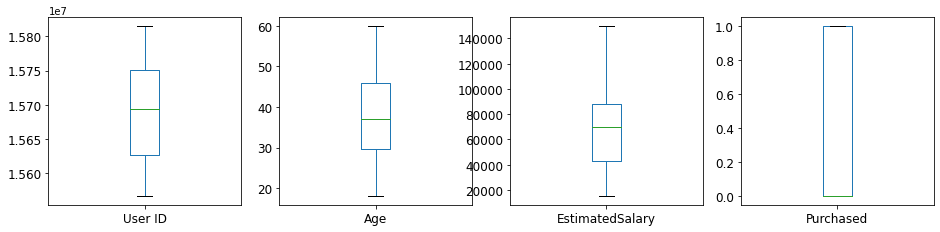

In [12]:
#Plotting Box plot to observe outliers
suv_dataset.plot(kind='box',subplots=True,layout=(5,5),fontsize=12,figsize=(20,20))
plt.show()

## 3. Data Wrangling

In [13]:
#Dropping unnecessary Columns/Features
suv_dataset.drop("User ID", axis=1,inplace=True)
suv_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [14]:
#Applying One Hot Encoding to get data in form of integer
sex=pd.get_dummies(suv_dataset["Gender"],drop_first=True)
sex.head(5)

,Male
0,1
1,1
2,0
3,0
4,1


In [15]:
suv_dataset=pd.concat([suv_dataset,sex],axis=1)

In [16]:
suv_dataset.head(10)

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1
5,Male,27,58000,0,1
6,Female,27,84000,0,0
7,Female,32,150000,1,0
8,Male,25,33000,0,1
9,Female,35,65000,0,0


In [17]:
suv_dataset.drop(["Gender"],axis=1,inplace=True)

In [18]:
suv_dataset.head(10)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
5,27,58000,0,1
6,27,84000,0,0
7,32,150000,1,0
8,25,33000,0,1
9,35,65000,0,0


In [19]:
#Observing Correlation Amoung features
suv_dataset.corr()

,Age,EstimatedSalary,Purchased,Male
Age,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.155238,1.000000,0.362083,-0.060435
Purchased,0.622454,0.362083,1.000000,-0.042469
Male,-0.073741,-0.060435,-0.042469,1.000000


## 4.Train Data and Test Data

In [20]:
y=suv_dataset["Purchased"]
X=suv_dataset.drop("Purchased",axis=1)

In [21]:
# training and testing model selection
from sklearn.model_selection import train_test_split

In [22]:
#Splitting Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

In [23]:
#Applying Standardisation
from sklearn.preprocessing import StandardScaler
 
sc= StandardScaler()
 
X_train = sc.fit_transform(X_train)
 
X_test = sc.transform(X_test)

In [24]:
X_train

array([[-1.17851785,  0.49595529,  1.04822013],
       [ 1.0033026 ,  0.76062623, -0.95399809],
       [ 0.05468501, -0.56272848,  1.04822013],
       ...,
       [-0.79907081,  0.29010011,  1.04822013],
       [ 0.14954677, -0.26864966, -0.95399809],
       [ 0.43413205,  1.11352083, -0.95399809]])

In [25]:
# Importing machine learning algorithm
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel=LogisticRegression(solver='lbfgs',max_iter=100000)

In [27]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

In [28]:
predictions=logmodel.predict(X_test)

## 5. Accuracy Check

In [29]:
# Model evaluation
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
confusion_matrix(y_test,predictions)

array([[37,  1],
       [ 3, 19]])

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,predictions)*100

93.33333333333333

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.95      0.86      0.90        22

    accuracy                           0.93        60
   macro avg       0.94      0.92      0.93        60
weighted avg       0.93      0.93      0.93        60



In [34]:
from sklearn.metrics import roc_curve,auc

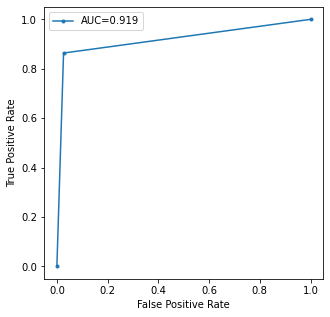

In [35]:
fpr,tpr,threshold=roc_curve(y_test,predictions)
auc_val=auc(fpr,tpr)

plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,marker=".",label="AUC=%0.3f" % auc_val)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()